In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X_train = df_train.drop(columns='label',axis=1).values/255.0
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
y_train = df_train['label'].values
y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [5]:
X_test = df_test.values/255.0
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [7]:
y_train = to_categorical(y_train, num_classes=10)

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), input_shape = (28,28,1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
history = model.fit(X_train,y_train, epochs = 50, batch_size=128, validation_split=0.1)


Epoch 1/50


296/296 [==============================] - 4s 11ms/step - loss: 0.3036 - accuracy: 0.9083 - val_loss: 0.0813 - val_accuracy: 0.9721
Epoch 2/50
296/296 [==============================] - 3s 10ms/step - loss: 0.0839 - accuracy: 0.9737 - val_loss: 0.0597 - val_accuracy: 0.9800
Epoch 3/50
296/296 [==============================] - 3s 11ms/step - loss: 0.0604 - accuracy: 0.9816 - val_loss: 0.0409 - val_accuracy: 0.9871
Epoch 4/50
296/296 [==============================] - 3s 10ms/step - loss: 0.0486 - accuracy: 0.9850 - val_loss: 0.0351 - val_accuracy: 0.9881
Epoch 5/50
296/296 [==============================] - 3s 10ms/step - loss: 0.0393 - accuracy: 0.9877 - val_loss: 0.0448 - val_accuracy: 0.9857
Epoch 6/50
296/296 [==============================] - 3s 10ms/step - loss: 0.0304 - accuracy: 0.9900 - val_loss: 0.0319 - val_accuracy: 0.9883
Epoch 7/50
296/296 [==============================] - 3s 10ms/step - loss: 0.0277 - accuracy: 0.9916 - val_loss: 0.0321 - val_accuracy: 0.9

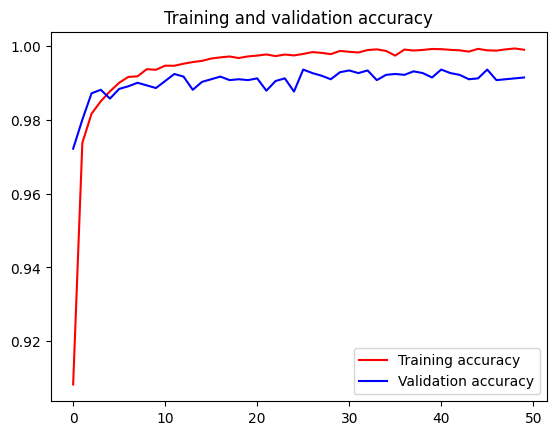

<Figure size 640x480 with 0 Axes>

In [11]:
# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [12]:
predictions = model.predict(X_test)

875/875 [==============================] - 1s 1ms/step


In [13]:
predicted_labels = predictions.argmax(axis=1)

In [14]:
submission = pd.DataFrame({'ImageId': range(1, len(predicted_labels) + 1), 'Label': predicted_labels})